In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.shape

(10000, 14)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X=df.iloc[:,3:13]

In [5]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [6]:
y=df.iloc[:,13]

In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
geo=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
X=pd.concat([X,geo,gender],axis=1)

In [10]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [11]:
X=X.drop(['Geography','Gender'],axis=1)

In [12]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
# dropout is used to fix overfitting removes noisy data(regularisation technique)

In [17]:
classifier=Sequential()

Metal device set to: Apple M1


2022-07-22 15:03:08.197652: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-22 15:03:08.197737: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [18]:
# first layer
# dense -it is used to create a fulll connected layer in which every output depends on every input
# units-hidden layer , input_dim-features given , kernel_intializer=weight intilizer, relu is our activation function
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [19]:
# second hidden layer(sigmoid is used in last layer)
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [20]:
# compiling ANN(artificial neural network)
# optimizer is imp in min batch to reduce noise ,
with tf.device("/gpu:0"):
    classifier.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy'])
#     fitting ann to our trainning set
    history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100


2022-07-22 15:03:08.282573: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-22 15:03:08.450443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


535/536 [============================>.] - ETA: 0s - loss: 0.5718 - accuracy: 0.7250

2022-07-22 15:03:11.234543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


536/536 [==============================] - 4s 6ms/step - loss: 0.5719 - accuracy: 0.7251 - val_loss: 0.4878 - val_accuracy: 0.8065
Epoch 2/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4573 - accuracy: 0.8097 - val_loss: 0.4482 - val_accuracy: 0.8069
Epoch 3/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4351 - accuracy: 0.8138 - val_loss: 0.4377 - val_accuracy: 0.8058
Epoch 4/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4270 - accuracy: 0.8140 - val_loss: 0.4328 - val_accuracy: 0.8050
Epoch 5/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4218 - accuracy: 0.8155 - val_loss: 0.4278 - val_accuracy: 0.8080
Epoch 6/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4163 - accuracy: 0.8216 - val_loss: 0.4229 - val_accuracy: 0.8118
Epoch 7/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4089 - accuracy: 0.8270 - val_loss: 0.4156 - val_accuracy: 0.8148
Epoch 8/100

536/536 [==============================] - 3s 6ms/step - loss: 0.3329 - accuracy: 0.8623 - val_loss: 0.3571 - val_accuracy: 0.8531
Epoch 59/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3326 - accuracy: 0.8619 - val_loss: 0.3580 - val_accuracy: 0.8523
Epoch 60/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3324 - accuracy: 0.8625 - val_loss: 0.3573 - val_accuracy: 0.8523
Epoch 61/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3324 - accuracy: 0.8628 - val_loss: 0.3583 - val_accuracy: 0.8493
Epoch 62/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3325 - accuracy: 0.8623 - val_loss: 0.3577 - val_accuracy: 0.8516
Epoch 63/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3321 - accuracy: 0.8621 - val_loss: 0.3578 - val_accuracy: 0.8538
Epoch 64/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3321 - accuracy: 0.8627 - val_loss: 0.3578 - val_accuracy: 0.8546
Epoch

In [26]:
# list all data in history

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


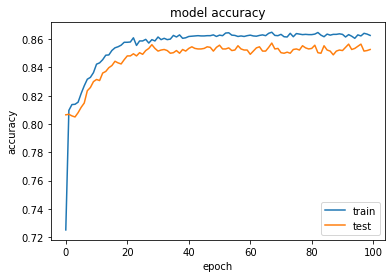

In [30]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

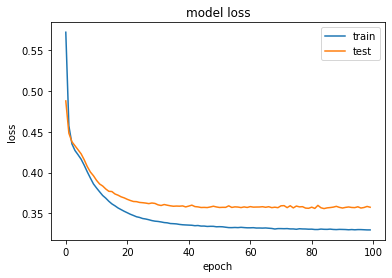

In [33]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [34]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


2022-07-22 15:56:09.936035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [35]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [36]:
# Making the Confusion Matrix(evaluation of classifier)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [37]:
cm

array([[1516,   79],
       [ 197,  208]])

In [38]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [39]:
score

0.862